# Used Cars Prices in UK

## Import relevant libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [3]:
prices = pd.read_csv("used_cars_UK.csv")
prices.head(20)

,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
5,5,Hyundai Coupe,800,124196,2007,3.0,Petrol,Coupe,2.0L,Manual,3.0,4.0,Euro 4,NaN
6,6,Ford Focus,798,140599,2008,NaN,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
7,7,Vauxhall Corsa,1995,90000,2009,NaN,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,NaN
8,8,Volvo 740,750,225318,1989,NaN,Petrol,Estate,2.3L,Automatic,5.0,NaN,NaN,NaN
9,9,Peugeot 207,1299,87000,2008,5.0,Diesel,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN


## Data Exploration and Cleaning

In [4]:
# Checking the dimensions of the dataset
print("Dataset dimensions:", prices.shape)

# Overview of the data types
print("\nData Types:\n", prices.dtypes)

#Checking for missing values
missing_values = prices.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Checking for duplicates
duplicated_values = prices.duplicated().sum()
print("\nDuplicated Values:\n", duplicated_values)

Dataset dimensions: (3685, 14)

Data Types:
 Unnamed: 0             int64
title                 object
Price                  int64
Mileage(miles)         int64
Registration_Year      int64
Previous Owners      float64
Fuel type             object
Body type             object
Engine                object
Gearbox               object
Doors                float64
Seats                float64
Emission Class        object
Service history       object
dtype: object

Missing Values:
 Unnamed: 0              0
title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1409
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3145
dtype: int64

Duplicated Values:
 0


### As we have to many missing values to drop all of them we will replace the NaN values instead.
Replace every NaN values to 0

In [5]:
# Drop the 'Unnamed' column
prices = prices.drop(columns='Unnamed: 0')

In [6]:
prices = prices.replace([np.nan], 0)
prices.head(20)

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,0
1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,Hyundai i30,949,137000,2011,0.0,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,0
3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,Vauxhall Corsa,1000,85000,2013,0.0,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,0
5,Hyundai Coupe,800,124196,2007,3.0,Petrol,Coupe,2.0L,Manual,3.0,4.0,Euro 4,0
6,Ford Focus,798,140599,2008,0.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,0
7,Vauxhall Corsa,1995,90000,2009,0.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,0
8,Volvo 740,750,225318,1989,0.0,Petrol,Estate,2.3L,Automatic,5.0,0.0,0,0
9,Peugeot 207,1299,87000,2008,5.0,Diesel,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,0


## Descriptive Statistics

In [7]:
# Statistical summary of the numerical columns
statistical_summary = prices.describe()
print(statistical_summary)


              Price  Mileage(miles)  Registration_Year  Previous Owners  \
count   3685.000000    3.685000e+03        3685.000000      3685.000000   
mean    5787.145726    8.132816e+04        2011.835007         1.734057   
std     4480.810572    3.942083e+04           5.092566         1.827033   
min      400.000000    1.000000e+00        1953.000000         0.000000   
25%     2490.000000    5.698400e+04        2008.000000         0.000000   
50%     4000.000000    8.000000e+04        2012.000000         1.000000   
75%     7995.000000    1.030000e+05        2015.000000         3.000000   
max    33900.000000    1.110100e+06        2023.000000         9.000000   

             Doors        Seats  
count  3685.000000  3685.000000  
mean      4.291723     4.853731  
std       1.045568     0.745628  
min       0.000000     0.000000  
25%       3.000000     5.000000  
50%       5.000000     5.000000  
75%       5.000000     5.000000  
max       5.000000     7.000000  


## Data Visualization and Analysis

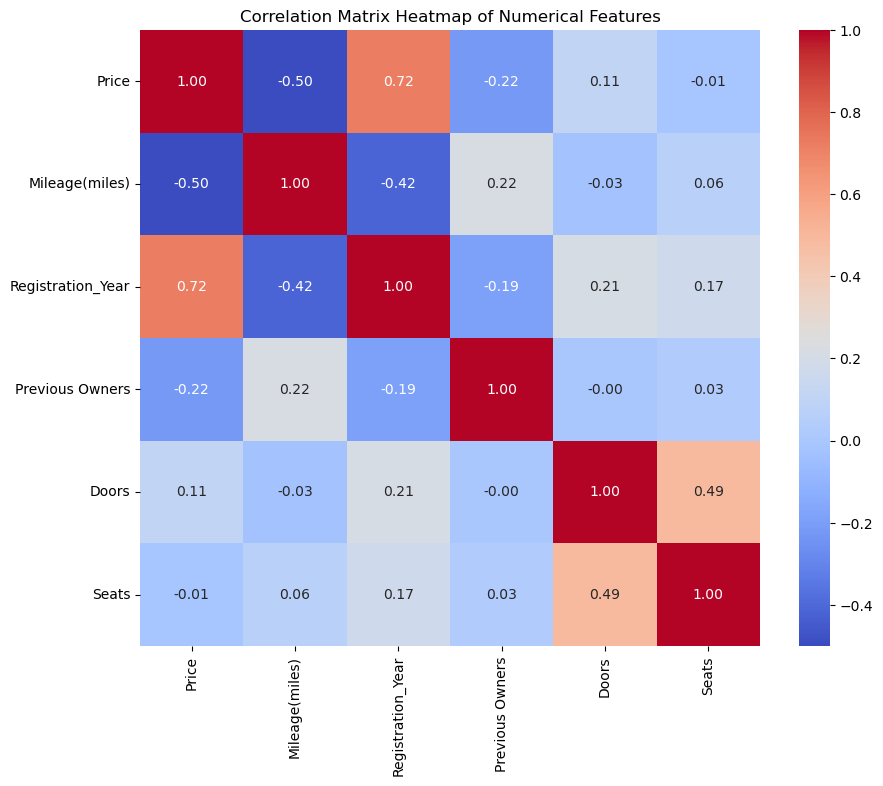

In [8]:
# Selecting only numerical columns for correlation analysis
numerical_cols = prices.select_dtypes(include=['int64', 'float64']).columns
numerical_prices_df = prices[numerical_cols]

# Correlation Analysis
correlation_matrix = numerical_prices_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap of Numerical Features')
plt.show()

## Price Distribution

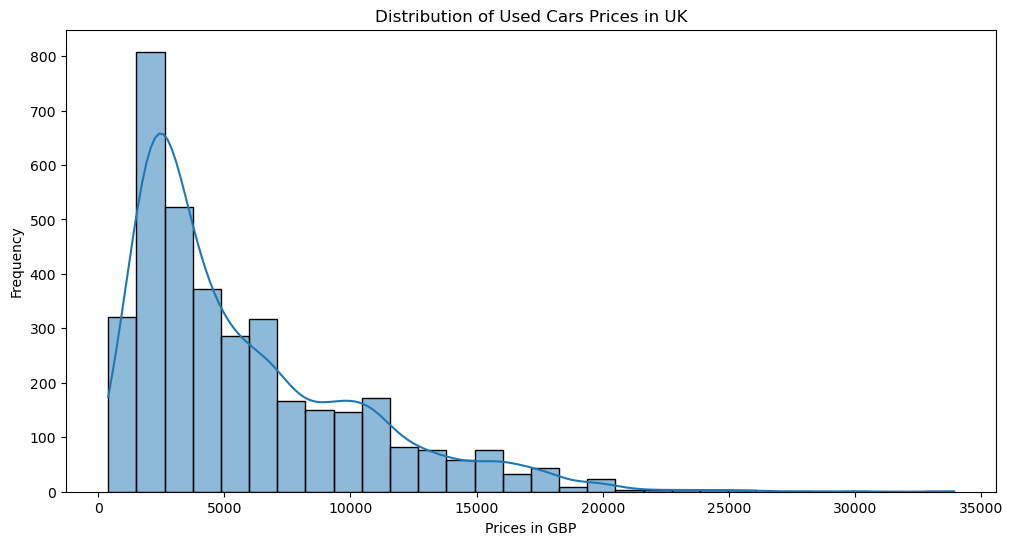

In [11]:
# Price Distribution Analysis
plt.figure(figsize=(12, 6))
sns.histplot(prices['Price'], kde=True, bins=30)
plt.title('Distribution of Used Cars Prices in UK')
plt.xlabel('Prices in GBP')
plt.ylabel('Frequency')
plt.show()

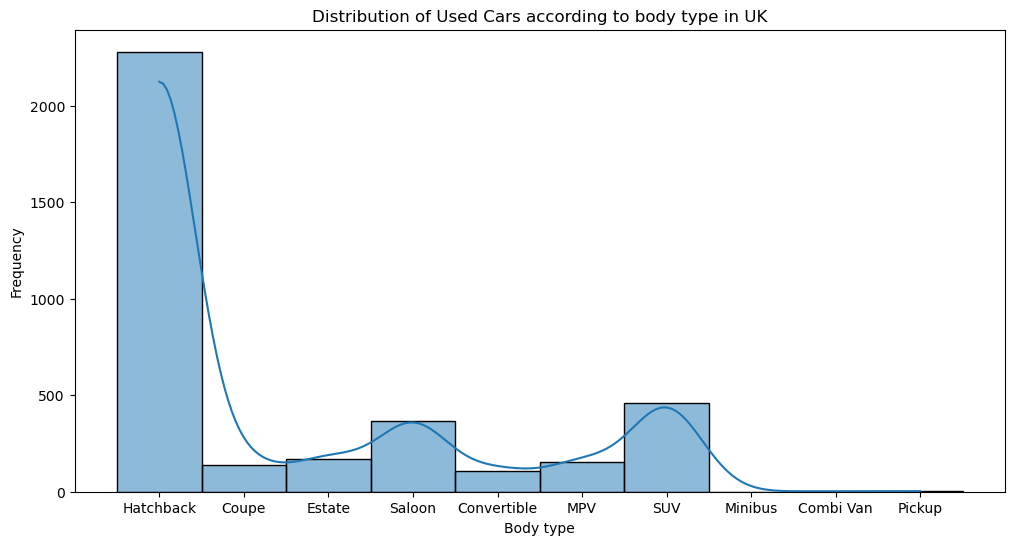

In [13]:
# Distribution According to body type Analysis
plt.figure(figsize=(12, 6))
sns.histplot(prices['Body type'], kde=True, bins=30)
plt.title('Distribution of Used Cars according to body type in UK')
plt.xlabel('Body type')
plt.ylabel('Frequency')
plt.show()